# Question 2 : Logistic Regression

    Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for given set of features(or inputs), X.

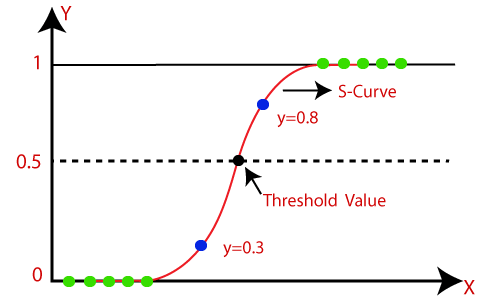

### LOGISTIC FUNCTION OR SIGMOID FUNCTION
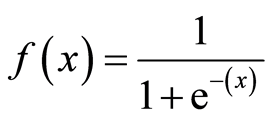

### Importing the libraries

In [27]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import cv2
import os

### Reading the image with open cv2

In [28]:
def read_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48,48))
    return image

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [29]:
path='../A3/A3/dataset/'
images=os.listdir(path)
len(images)

520

### Reading labels from image

In [30]:
labels=[]
for image_name in images:
    temp=image_name.split('.')[0]
    temp=temp.split('_')
#     print(temp)
    labels.append(int(temp[0]))
labels=np.array(labels)
labels

array([4, 4, 3, 6, 6, 0, 5, 7, 2, 6, 7, 2, 3, 1, 4, 6, 1, 5, 1, 7, 1, 3,
       6, 0, 1, 3, 0, 7, 6, 2, 1, 6, 3, 6, 7, 4, 6, 4, 3, 2, 5, 3, 1, 7,
       7, 3, 0, 4, 4, 5, 2, 2, 3, 3, 5, 0, 1, 4, 2, 0, 3, 0, 3, 6, 7, 1,
       0, 7, 0, 5, 4, 5, 6, 7, 2, 3, 6, 2, 2, 1, 1, 6, 1, 3, 1, 4, 2, 0,
       3, 3, 5, 2, 5, 0, 2, 4, 0, 4, 0, 6, 0, 1, 5, 5, 7, 1, 5, 4, 1, 0,
       4, 6, 3, 7, 6, 5, 2, 1, 2, 5, 5, 4, 2, 1, 3, 3, 3, 1, 4, 4, 4, 5,
       5, 5, 7, 3, 6, 0, 3, 6, 4, 1, 0, 1, 6, 6, 7, 7, 7, 0, 0, 5, 3, 4,
       2, 6, 3, 0, 3, 1, 2, 0, 7, 4, 3, 2, 4, 4, 2, 5, 6, 0, 0, 5, 6, 3,
       7, 3, 0, 0, 7, 6, 0, 0, 2, 1, 0, 3, 6, 6, 5, 6, 6, 1, 2, 0, 7, 7,
       3, 2, 7, 5, 5, 5, 1, 4, 2, 1, 6, 2, 0, 7, 6, 7, 7, 0, 4, 1, 7, 2,
       5, 7, 5, 5, 5, 1, 6, 7, 3, 0, 0, 1, 6, 7, 7, 4, 7, 5, 3, 4, 6, 4,
       5, 0, 6, 0, 6, 7, 0, 1, 3, 4, 2, 3, 2, 7, 2, 1, 2, 2, 0, 0, 4, 1,
       5, 6, 4, 5, 7, 4, 1, 2, 2, 3, 7, 0, 5, 3, 2, 5, 2, 4, 5, 3, 6, 6,
       7, 6, 7, 2, 4, 6, 5, 7, 6, 0, 2, 3, 4, 7, 6,

### Preprocessing the dataset (Resize, Grayscaled and Flatten)

In [31]:
dataset = []
for image_name in images:
    dataset.append(read_image(path + image_name))
dataset=np.array(dataset)


dataset_grayscaled=[]
for i in range(dataset.shape[0]):
    gray = rgb2gray(dataset[i])
    dataset_grayscaled.append(gray)
dataset_grayscaled=np.array(dataset_grayscaled)
dataset_grayscaled.shape

(520, 48, 48)

In [32]:
final_dataset=[]
for i in range(dataset_grayscaled.shape[0]):
    final_dataset.append(dataset_grayscaled[i].flatten())
    
final_dataset=np.array(final_dataset)
final_dataset

array([[ 33.3195,   7.7339,  18.4993, ...,   5.0812,   4.0813,  13.4933],
       [ 40.1594,  28.612 ,  16.1788, ...,  23.8792,  32.4761,  29.1174],
       [ 62.4066,   6.4446,  10.8895, ...,  21.6927,  23.6925,  16.6932],
       ...,
       [146.9072, 148.907 , 153.9065, ...,  73.2764,  81.0198,  77.0633],
       [ 44.1761,  58.3982,  63.8384, ...,  73.797 ,  30.6442,  53.9686],
       [ 61.0019,  56.7204,  71.8931, ...,  32.0695,  26.4291,  25.0872]])

In [33]:
final_dataset.shape

(520, 2304)

### Read image

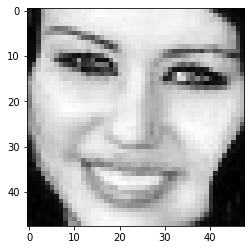

In [47]:
plt.imshow(final_dataset[0].reshape(48,48),cmap='gray')

### Spliting the data into Train and Test

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_dataset, labels, test_size=0.30, random_state=42)

## Function for Performing the PCA from 1st question

In [36]:
def pca(X,n_c):
    #covarience matrix

    dataset_mean=np.mean(X,axis=0)
    dataset_mean.shape
    covariance_matrix = (X - dataset_mean).T.dot((X - dataset_mean))/(X.shape[0]-1)
    #covariance_matrix.shape
    
    #Svd
    u,s,v = np.linalg.svd(covariance_matrix)
    print(u.shape)
    
    Y = np.matmul(X,u[:,:n_c])
    return Y,u

In [52]:
def reconstruct_from_pca(Y,u):
    n=Y.shape[1]
    print('n : ',n)
    return np.matmul(Y,u[:,:n].T)
    

## Calculate and Report useful metrics for the model like

    1. Accuracy Score
    2. Precision
    3. Recall 
    4. F1-Score
    5. Confusion matrix
    6. Classification report

    So for simplicity, I have made the function which calculates all these things and we don't have to write the code again and again.

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



def calc_report_metrics(testlabels,pred):
    cm=confusion_matrix(testlabels,pred)
    print('Confusion Matrix : \n\n',cm)
    print()
    accu = accuracy_score(testlabels,pred)
    print('Accuracy : ',accu)
    print()
    precision = precision_score(testlabels,pred,average='macro')
    print('Precision : ',precision)
    print()
    recall = recall_score(testlabels,pred,average='macro')
    print('Recall : ',recall)
    print()
    f1s = f1_score(testlabels,pred,average='macro')
    print('F1-Score : ',f1s)
    print()
    report=classification_report(testlabels,pred)
    print('Classification Report : \n',report)
    print()

### Performing PCA

In [71]:
X_pca,u=pca(X_train,200)

(2304, 2304)


### Normalizing the dataset

In [68]:
from sklearn.preprocessing import StandardScaler
def normalize(X_train,X_test):
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)

    X_test=scaler.transform(X_test)

    return X_train,X_test

### Implementing the Logistic Regression

### Sigmoid Function

In [54]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Train function which uses gradient descent

In [65]:
def train(X_train,y_train,itr=5000,a=0.1):
    X_train=np.insert(X_train,0,1, axis=1)
    thetas = []
    classes = np.unique(y_train)
    costs = []
    print('Training ...')
    m=len(y_train)
    for c in classes:
        yb=np.where(y_train==c,1,0)
        theta = np.zeros(X_train.shape[1])
        cost=np.zeros(itr)
        for i in range(itr):
            h=sigmoid(np.matmul(X_train,theta))
            cost[i]= 1/m*np.sum(-yb * np.log(h) - (1 - yb) * np.log(1 - h))
            error=h-yb
            diff_cost= 1/m*np.matmul(error,X_train)
            theta = theta - a*diff_cost

        thetas.append(theta)
        costs.append(cost)

    return costs,thetas,classes 

### Predict function

In [66]:
def predict(classes, thetas, x_test):
    x_test = np.insert(x_test, 0, 1, axis=1)
    preds = [np.argmax([sigmoid(xi @ theta) for theta in thetas]) for xi in x_test]
#     print(preds)
    return [classes[p] for p in preds]

### Training data

In [63]:
itr=2000
a=0.01

In [70]:
X_train, X_test = normalize(X_train,X_test)

In [72]:
costs, thetas, classes=train(X_pca,y_train,itr,a)

Training ...


In [73]:
X_test=np.matmul(X_test,u[:,:200])

In [74]:
predicted_labels = predict(classes, thetas, X_test)
print(metrics.accuracy_score(y_test,predicted_labels))
predicted_labels

0.6538461538461539


[0,
 5,
 5,
 4,
 5,
 1,
 3,
 1,
 1,
 3,
 7,
 7,
 4,
 3,
 7,
 6,
 5,
 3,
 7,
 6,
 6,
 6,
 2,
 7,
 0,
 3,
 3,
 7,
 7,
 3,
 1,
 1,
 4,
 2,
 2,
 3,
 2,
 5,
 1,
 4,
 7,
 3,
 0,
 0,
 6,
 4,
 5,
 7,
 1,
 7,
 0,
 4,
 6,
 1,
 1,
 7,
 7,
 7,
 3,
 2,
 5,
 4,
 5,
 3,
 5,
 1,
 0,
 4,
 5,
 6,
 2,
 6,
 4,
 6,
 4,
 6,
 5,
 2,
 7,
 1,
 3,
 4,
 3,
 7,
 5,
 3,
 1,
 2,
 5,
 0,
 2,
 0,
 7,
 3,
 7,
 3,
 5,
 6,
 1,
 3,
 2,
 6,
 1,
 7,
 4,
 1,
 5,
 5,
 3,
 0,
 2,
 0,
 2,
 5,
 2,
 0,
 5,
 4,
 7,
 0,
 2,
 6,
 3,
 6,
 6,
 6,
 0,
 0,
 7,
 4,
 1,
 7,
 5,
 0,
 2,
 3,
 0,
 1,
 6,
 2,
 2,
 6,
 4,
 5,
 6,
 7,
 2,
 4,
 2,
 7,
 3,
 0,
 5,
 6,
 0,
 0]

In [76]:
calc_report_metrics(y_test,predicted_labels)

Confusion Matrix : 

 [[13  1  1  1  0  2  2  1]
 [ 2 10  2  4  1  2  2  0]
 [ 1  1 13  0  1  0  5  0]
 [ 0  1  0 13  3  0  0  1]
 [ 1  1  0  0 11  2  1  2]
 [ 0  1  0  2  0 13  0  0]
 [ 2  2  2  0  0  2 10  0]
 [ 0  0  1  1  0  0  0 19]]

Accuracy :  0.6538461538461539

Precision :  0.6510423176707754

Recall :  0.6598785800552105

F1-Score :  0.6507975432511036

Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.62      0.65        21
           1       0.59      0.43      0.50        23
           2       0.68      0.62      0.65        21
           3       0.62      0.72      0.67        18
           4       0.69      0.61      0.65        18
           5       0.62      0.81      0.70        16
           6       0.50      0.56      0.53        18
           7       0.83      0.90      0.86        21

    accuracy                           0.65       156
   macro avg       0.65      0.66      0.65       156
weighted av

In [ ]:
def plot_cost_graph(itr,costs):
    x = [i for i in range(1,itr+1)]  
    y = costs[0]

    plt.plot(x, y) 
    plt.xlabel('No. of iterations') 
    plt.ylabel('cost')  
    plt.title('Cost Graph') 
    plt.show() 

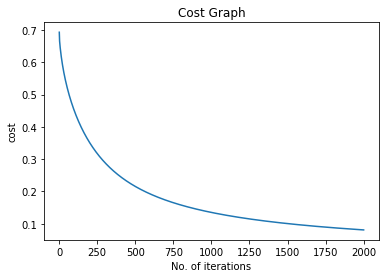

In [75]:
plot_cost_graph(itr,costs)